In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import sys
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Circle
import seaborn as sns; 
from IPython.display import HTML

In [3]:
#config parser
import configparser

sys.path.insert(0, '../Common/')
from AISDataManager import AISDataManager
import Constants as c
import HMUtils as hMUtil
import TimeUtils as timeUtils

#MyConfig.INI stores all the run time constants
config = configparser.ConfigParser()
config.read('../MyConfig.INI')

from joblib import Parallel, delayed
import multiprocessing
aISDM = AISDataManager()

In [4]:
lonMin = (float)(config['REGION']['LON_MIN'])
lonMax = (float)(config['REGION']['LON_MAX'])

latMin = (float)(config['REGION']['LAT_MIN'])
latMax = (float)(config['REGION']['LAT_MAX'])

print(lonMin,latMin)
print(lonMax,latMax)

increStep = (float)(config['HEATMAP']['INCR_STEP'])
incrRes = (int)(config['HEATMAP']['INCR_RES'])

-120.0 34.12
-119.5 34.24


In [5]:
#compute KDE from this heat map
#kde takes two dimensional data
#replace every point from the heatmap to corresponding middle value of coordinate
#first get the boundar array
heatMapGrid = hMUtil.generate_grid(lonMin, lonMax, latMin, latMax, increStep, incrRes)
boundaryArray = heatMapGrid[2]
horizontalAxis = heatMapGrid[0]
verticalAxis = heatMapGrid[1]

In [6]:
SOURCE_DIR = "M120_00_M190_50_34_12_34_24"

yearlyHMNP = np.load("../Data/"+SOURCE_DIR+"/YearlyHM.npy")

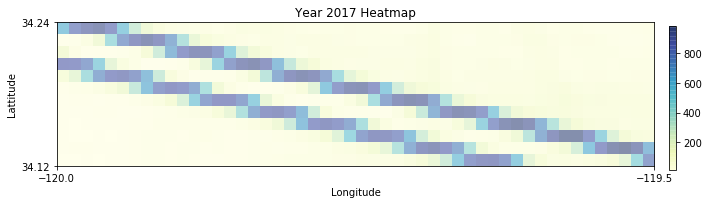

In [24]:
useAspect = 0
aspectRatio = 16.0/9.0
figWidth = 10
figHeight = 4

if useAspect == 1:
    figHeight = figWidth/aspectRatio

fig = plt.figure(figsize=(figWidth,figHeight))
ax1 = fig.add_axes([0.1, 0.15, 0.83, 0.73])
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Lattitude')
ax1.set_title('Year 2017 Heatmap')
ax1.set_xticks([lonMin,lonMax])
ax1.set_yticks([latMin,latMax])
# ax1.imshow()
yearlyHMImg = np.reshape(yearlyHMNP,(verticalAxis.shape[0],horizontalAxis.shape[0]))
yearlyHMImg = np.flip(yearlyHMImg,axis=0)

iMShowHandler = ax1.imshow(yearlyHMImg,cmap=plt.get_cmap('YlGnBu'),extent=[lonMin,lonMax,latMin,latMax],alpha = 0.5)

ax2 = fig.add_axes([0.95, 0.25, 0.01, 0.50])
fig.colorbar(iMShowHandler,ax2)
fig.savefig("YearlyHM.png")